In [ ]:
# Colab connect drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pycountry
!pip install geopy
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=6a9afb81e06228bdad104bb20353db64fdeaae52fc32dba81be8fa638a71a468
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: h

In [ ]:
# Import thu vien
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read data

df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/KHDL/Dataset.xlsx')

In [ ]:
# In thu 10 dong du lieu
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Dem thu so luong dong
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [ ]:
# Loai bo gia tri nan
df_not_nan = df[df['CustomerID'].notna()]
# df_not_nan = df_not_nan.sample(10000, random_state=42)
df_not_nan.to_csv("/content/gdrive/MyDrive/Colab Notebooks/KHDL/dataset_fillNaN.csv")
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Vẽ bản đồ

In [ ]:
df_x = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHDL/dataset_fillNaN.csv")
df_x['TotalPay'] =df_x['Quantity'] * df_x['UnitPrice']
df_x=df_x[['Country','TotalPay']]
df_x

,Country,TotalPay
0,United Kingdom,15.30
1,United Kingdom,20.34
2,United Kingdom,22.00
3,United Kingdom,20.34
4,United Kingdom,20.34
...,...,...
406824,France,10.20
406825,France,12.60
406826,France,16.60
406827,France,16.60


In [ ]:
#Tính tổng TotalPay của các quốc gia
df_1=df_x.groupby('Country').aggregate(np.sum)
#lưu vào file excel
df_1.to_excel("/content/gdrive/MyDrive/Colab Notebooks/KHDL/country.xlsx")

In [ ]:
#Đọc file excel tính tổng TotalPay của các quốc gia
df_1 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/KHDL/country.xlsx")
df_1

,Country,TotalPay
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Cyprus,12946.290
7,Czech Republic,707.720
8,Denmark,18768.140
9,European Community,1291.750


In [ ]:
#Đọc file chứa mã ISO của các quốc gia dùng để vẽ bản đồ
world = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHDL/data_country.csv")
world

,Country,ISO_A2,ISO_A3,geometry
0,Afghanistan,AF,AFG,NaN
1,Aland Islands,AX,ALA,NaN
2,Albania,AL,ALB,NaN
3,Algeria,DZ,DZA,NaN
4,American Samoa,AS,ASM,NaN
...,...,...,...,...
244,Wallis and Futuna,WF,WLF,NaN
245,Western Sahara,EH,ESH,NaN
246,Yemen,YE,YEM,NaN
247,Zambia,ZM,ZMB,NaN


In [ ]:
# gộp 2 bảng data_country và country để được 1 bảng chứa các thuộc tính 'Country','ISO_A2','ISO_A3','UnitPrice','geometry' dùng để vẽ bản đồ thể hiện tổng số tiền các quốc giá đã mua hàng
add_table = pd.merge(world, df_1, on="Country", how="outer")
add_table = add_table[add_table['ISO_A3'].notna()]
add_table = add_table[['Country','ISO_A2','ISO_A3','TotalPay','geometry']]
# lưu lại bảng thành file CSV
add_table.to_csv("/content/gdrive/MyDrive/Colab Notebooks/KHDL/add_table.csv")
add_table

,Country,ISO_A2,ISO_A3,TotalPay,geometry
0,Afghanistan,AF,AFG,NaN,NaN
1,Aland Islands,AX,ALA,NaN,NaN
2,Albania,AL,ALB,NaN,NaN
3,Algeria,DZ,DZA,NaN,NaN
4,American Samoa,AS,ASM,NaN,NaN
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,NaN,NaN
245,Western Sahara,EH,ESH,NaN,NaN
246,Yemen,YE,YEM,NaN,NaN
247,Zambia,ZM,ZMB,NaN,NaN


In [ ]:
#Đọc file CSV
table = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHDL/add_table.csv")
table.drop(['Unnamed: 0'], axis=1, inplace=True)
table


,Country,ISO_A2,ISO_A3,TotalPay,geometry
0,Afghanistan,AF,AFG,NaN,NaN
1,Aland Islands,AX,ALA,NaN,NaN
2,Albania,AL,ALB,NaN,NaN
3,Algeria,DZ,DZA,NaN,NaN
4,American Samoa,AS,ASM,NaN,NaN
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,NaN,NaN
245,Western Sahara,EH,ESH,NaN,NaN
246,Yemen,YE,YEM,NaN,NaN
247,Zambia,ZM,ZMB,NaN,NaN


In [ ]:

#Hàm lấy dữ liệu kinh độ và vĩ độ từ tên quốc gia
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Xác định vị trí trung tâm của đất nước
        loc = geolocator.geocode(country)
        # Và trả về vĩ độ và kinh độ
        return (loc.latitude, loc.longitude)
    except:
        # Nếu không tồn tại quốc gia trả về NaN
        return np.nan

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
# Thêm giá trị kinh độ và vĩ độ của các quốc gia vào cột geometry trong bảng table
a=[]
for x in range(len(table)):
   a.append(geolocate(table['Country'].iloc[x]))
table['geometry'] = a
table
    

,Country,ISO_A2,ISO_A3,TotalPay,geometry
0,Afghanistan,AF,AFG,NaN,"(33.7680065, 66.2385139)"
1,Aland Islands,AX,ALA,NaN,"(60.2166218, 19.9438638)"
2,Albania,AL,ALB,NaN,"(41.000028, 19.9999619)"
3,Algeria,DZ,DZA,NaN,"(28.0000272, 2.9999825)"
4,American Samoa,AS,ASM,NaN,"(-14.297124, -170.7131481)"
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,NaN,"(-13.289402, -176.204224)"
245,Western Sahara,EH,ESH,NaN,"(24.16819605, -13.892143025000001)"
246,Yemen,YE,YEM,NaN,"(16.3471243, 47.8915271)"
247,Zambia,ZM,ZMB,NaN,"(-14.5189121, 27.5589884)"


In [ ]:
#lưu file CSV
table.to_csv("/content/gdrive/MyDrive/Colab Notebooks/KHDL/final.csv")

In [ ]:
#Đọc file CSV
table =  pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/KHDL/final.csv')
#gán các giá trị NaN bằng 0
table = table.fillna(0)
table.drop(['Unnamed: 0'], axis=1, inplace=True)
table

,Country,ISO_A2,ISO_A3,TotalPay,geometry
0,Afghanistan,AF,AFG,0.0,"(33.7680065, 66.2385139)"
1,Aland Islands,AX,ALA,0.0,"(60.2166218, 19.9438638)"
2,Albania,AL,ALB,0.0,"(41.000028, 19.9999619)"
3,Algeria,DZ,DZA,0.0,"(28.0000272, 2.9999825)"
4,American Samoa,AS,ASM,0.0,"(-14.297124, -170.7131481)"
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,0.0,"(-13.289402, -176.204224)"
245,Western Sahara,EH,ESH,0.0,"(24.16819605, -13.892143025000001)"
246,Yemen,YE,YEM,0.0,"(16.3471243, 47.8915271)"
247,Zambia,ZM,ZMB,0.0,"(-14.5189121, 27.5589884)"


In [ ]:
# Vẽ bản đồ thể hiện tổng số tiền mua hàng của các quốc gia
import plotly.express as px
import pycountry
fig = px.choropleth(data_frame = table,
                    locations= "ISO_A3",
                    color = 'TotalPay',
                    color_continuous_scale='portland',
                    range_color=(0, 15000), 
                    hover_name= "Country",
                    title = "Customer_Segmentation")
fig.show()

Phân cụm khách hàng

In [ ]:
# Tinh toan RFM

# -------- Tinh R - Recency

# Chuyen tu string -> date
df_not_nan['InvoiceDate'] =  pd.to_datetime(df_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Lay ngay lon nhat trong InvoiceDate + 1
import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)

# -------- Tinh M - MoneytaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

# Group by CustomerID de tinh R, F, M

df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'TotalPay':'sum'
     }
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:

df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

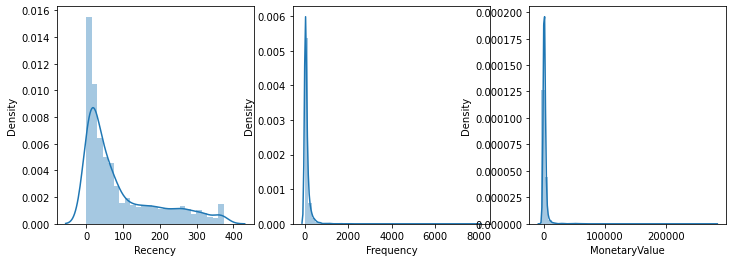

In [ ]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequency'], ax = ax[1])
sns.distplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

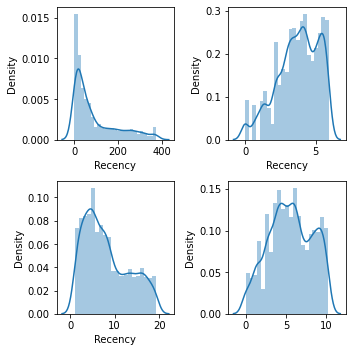

1.25
-0.53
0.59
-0.07


In [ ]:
analyze_skewness('Recency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

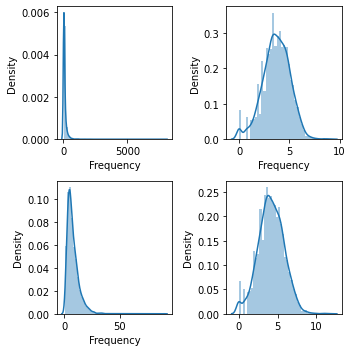

18.15
-0.24
3.2
0.0


In [ ]:
analyze_skewness('Frequency')

In [ ]:
# Tien hanh transform du lieu

df_customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)

,Recency,Frequency,MonetaryValue
0,9.876619,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001
5,4.942814,5.201183,11.561510
6,8.666162,1.442672,4.464745
7,8.988684,4.570059,10.257955
8,8.785339,2.762414,7.716085
9,4.147379,4.591627,14.113750


In [ ]:
# Tien hanh scale du lieu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)

In [ ]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,1.611173,-2.098072,-1.925647
1,-1.797592,1.151346,1.330542
2,0.309053,-0.224316,0.507038
3,-0.645121,0.423978,0.488997
4,1.560964,-0.660498,-0.536848


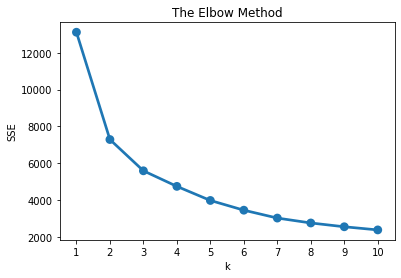

In [ ]:
# Dua du lieu vao KMeans

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_customers_t)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1


In [ ]:
# print(type(df_customers["Cluster"]))

<class 'pandas.core.series.Series'>


In [ ]:
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,17.88,312.26,7356.52
1,185.51,19.15,351.30
2,42.63,67.12,1003.74


Vẽ biều đồ

In [ ]:
x1 = df_customers["Cluster"].isin([0])
k1 = df_customers[x1]
# k1.to_csv("Cluster0.csv")



In [ ]:
x2 = df_customers["Cluster"].isin([1])
k2 = df_customers[x2]
# k2.to_csv("Cluster1.csv")


In [ ]:
x3 = df_customers["Cluster"].isin([2])
k3 = df_customers[x3]
# k3.to_csv("Cluster2.csv")

In [ ]:
c_0 = len(k1)
c_1 = len(k2)
c_2 = len(k3)
row = ['name', 'amount']
data0 = [0,c_0]
data1 = [1,c_1]
data2 = [2,c_2]
import csv
with open('/content/gdrive/MyDrive/Colab Notebooks/KHDL/cluster.csv', 'w', encoding='UTF8') as f:
    # create the csv writer
    writer = csv.writer(f)
  
    # write a row to the csv file
    writer.writerow(row)
    writer.writerow(data0)
    writer.writerow(data1)
    writer.writerow(data2)


In [ ]:
cluster = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/KHDL/cluster.csv')
cluster = cluster[cluster.notna()]
cluster


,name,amount
0,0,785
1,1,1648
2,2,1939


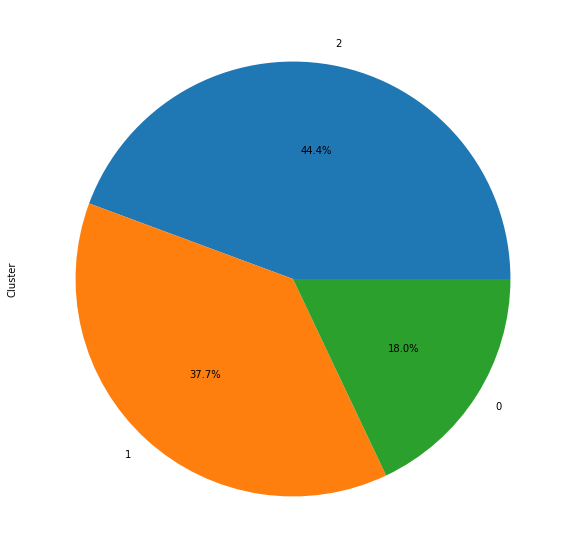

In [ ]:
plt.figure(figsize=(20,10))
df_customers['Cluster'].value_counts().plot.pie(autopct = "%1.1f%%")

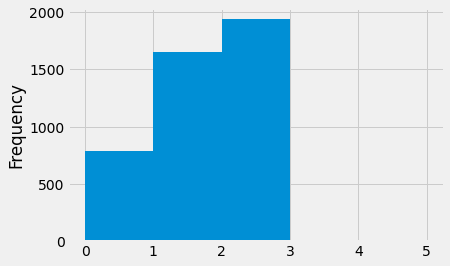

In [ ]:
# name_cluster = cluster['name']
# amount_cluster = cluster['amount']
plt.style.use('fivethirtyeight')
df_customers['Cluster'].plot.hist(alpha = 1,bins = [0,1,2,3,4,5])


Text(0.5, 1.0, 'Thể hiện số lượng sp và giá tiền của sp')

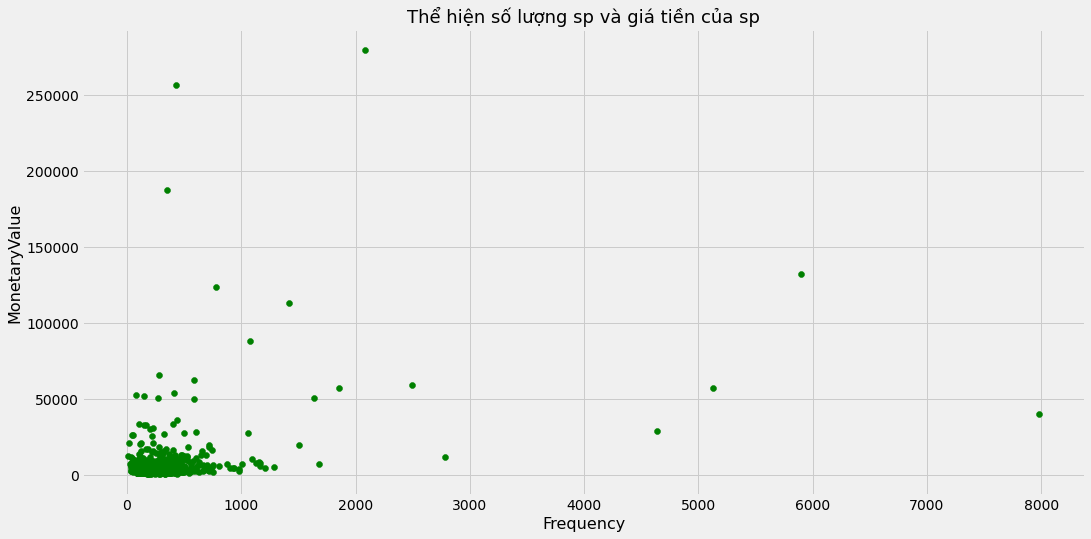

In [ ]:
# lấy x, y
x = k1['Frequency']
y = k1['MonetaryValue']
# Vẽ biểu đồ line 
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('MonetaryValue', fontsize=16)
plt.title("Thể hiện số lượng sp và giá tiền của sp", fontsize=18)

Text(0.5, 1.0, 'Thể hiện số lượng sp và giá tiền của sp')

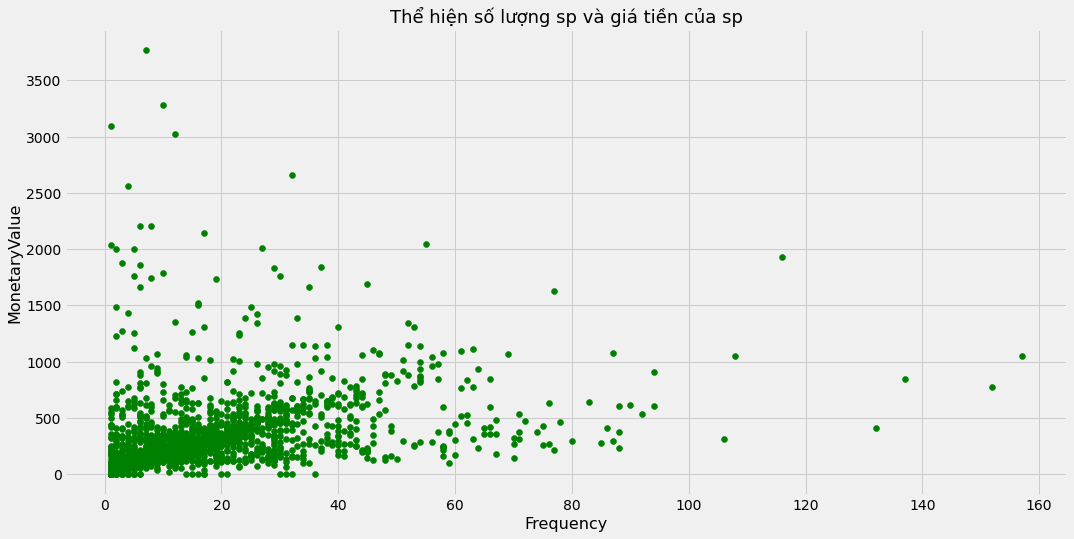

In [ ]:
# lấy x, y
x = k2['Frequency']
y = k2['MonetaryValue']
# Vẽ biểu đồ line 
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('MonetaryValue', fontsize=16)
plt.title("Thể hiện số lượng sp và giá tiền của sp", fontsize=18)

Text(0.5, 1.0, 'Thể hiện số lượng sp và giá tiền của sp')

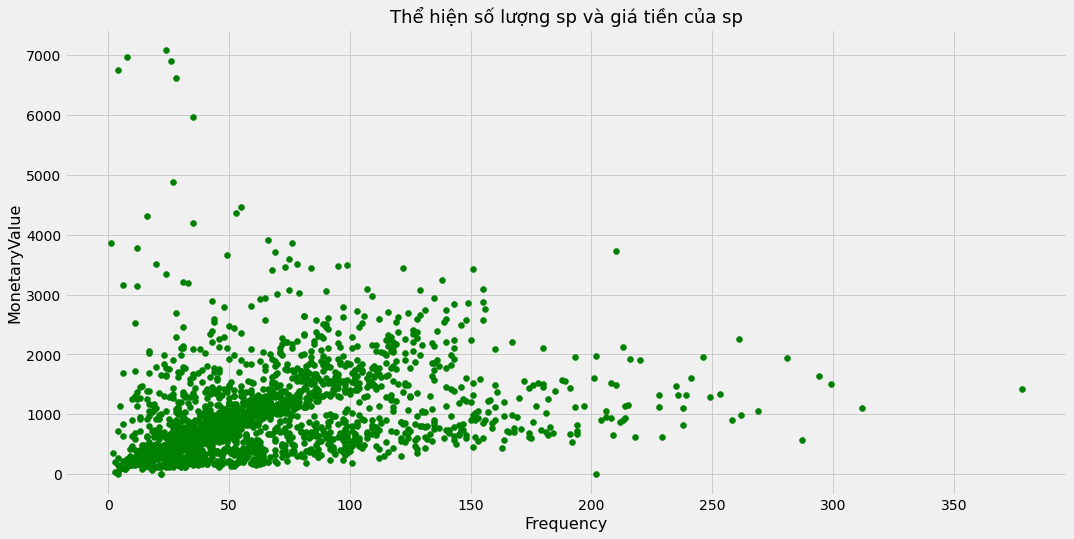

In [ ]:
# lấy x, y
x = k3['Frequency']
y = k3['MonetaryValue']
# Vẽ biểu đồ line 
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('MonetaryValue', fontsize=16)
plt.title("Thể hiện số lượng sp và giá tiền của sp", fontsize=18)